In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import gridspec

import os
for dirname, _, filenames in os.walk('../input/NASA-bearing-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv
../input/NASA-bearing-dataset/sample_1st.csv
../input/NASA-bearing-dataset/merged_dataset_BearingTest_1.csv
../input/NASA-bearing-dataset/sample_2nd.csv
../input/NASA-bearing-dataset/merged_dataset_BearingTest_3.csv
../input/NASA-bearing-dataset/sample_3rd.csv


## Have a look to a sample time serie
Set No. 2, first file:
- 2kHz acquisition rate, 1s in total

In [2]:
sample2 = pd.read_csv("../input/NASA-bearing-dataset/sample_2nd.csv",index_col=0)
sample2.shape

(20479, 4)

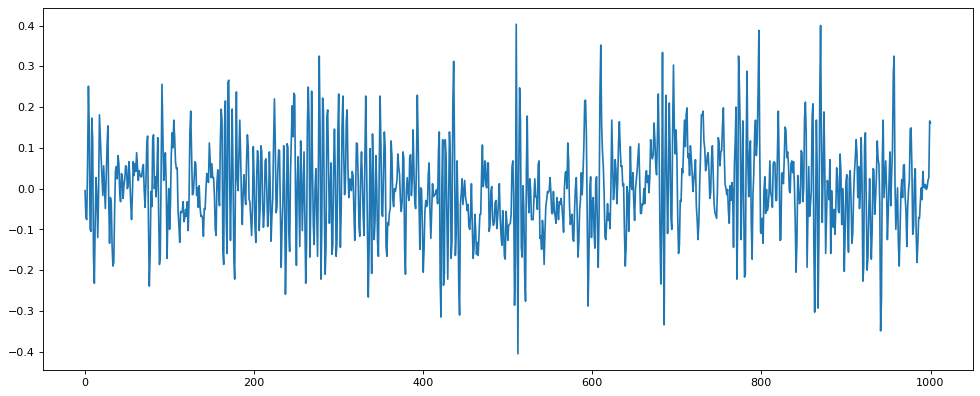

In [3]:
figure(figsize=(15, 6), dpi=80)
sample2['Bearing 1'].loc[:1000].plot()
plt.show()

# Dataset preprocessing

In [4]:
# Read the CSV file and set first column as the dataframe index
dataset = pd.read_csv("../input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv",
                      index_col=0)
dataset.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.080905,0.078532,0.081356,0.047822
std,0.040171,0.011779,0.011596,0.009541
min,0.001168,0.000767,0.000716,0.001699
25%,0.060765,0.074233,0.076832,0.043950
50%,0.062007,0.075203,0.078197,0.044524
75%,0.083223,0.077456,0.080600,0.048111
max,0.453335,0.161016,0.151299,0.119047


## Normalize the dataset

In [5]:
from sklearn import preprocessing

# Dataset is scaled so that maximum for every column is 1
scaler = preprocessing.MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), 
                              columns=dataset.columns, 
                              index=dataset.index)
dataset_scaled.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.176344,0.485273,0.535517,0.393047
std,0.088842,0.073507,0.077007,0.081305
min,0.000000,0.000000,0.000000,0.000000
25%,0.131803,0.458450,0.505473,0.360049
50%,0.134550,0.464499,0.514541,0.364941
75%,0.181470,0.478561,0.530498,0.395511
max,1.000000,1.000000,1.000000,1.000000


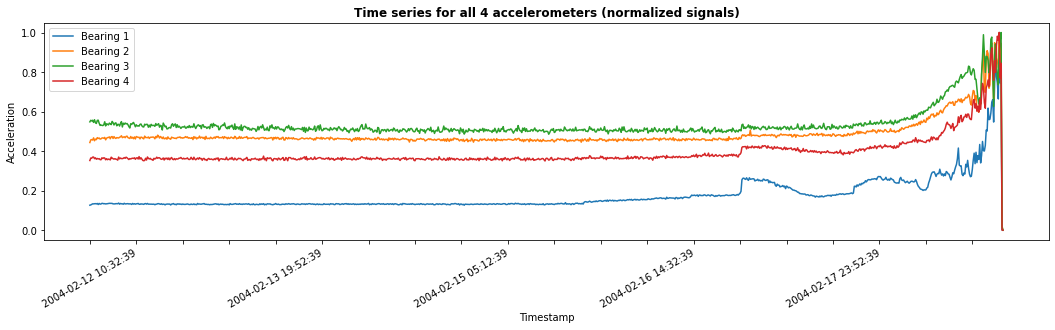

In [6]:
x_ticks_span = 50

dataset_scaled.plot(figsize=(18, 4))
plt.xlabel('Timestamp')
plt.xticks(np.arange(0, dataset_scaled.shape[0], x_ticks_span), fontsize=10, rotation = 30)
plt.ylabel('Acceleration')


plt.legend(loc="upper left")  
plt.title('Time series for all 4 accelerometers (normalized signals)', fontweight ="bold")
plt.show()

## Build train and test datasets
- We want the training set contains only "normal" data
- The rest of points will be in the test set, that will contain both "normal" and anomalous data

In [7]:
print("dataset_scaled shape is",dataset_scaled.shape,"\n\n", dataset_scaled.index)

dataset_scaled shape is (984, 4) 

 Index(['2004-02-12 10:32:39', '2004-02-12 10:42:39', '2004-02-12 10:52:39',
       '2004-02-12 11:02:39', '2004-02-12 11:12:39', '2004-02-12 11:22:39',
       '2004-02-12 11:32:39', '2004-02-12 11:42:39', '2004-02-12 11:52:39',
       '2004-02-12 12:02:39',
       ...
       '2004-02-19 04:52:39', '2004-02-19 05:02:39', '2004-02-19 05:12:39',
       '2004-02-19 05:22:39', '2004-02-19 05:32:39', '2004-02-19 05:42:39',
       '2004-02-19 05:52:39', '2004-02-19 06:02:39', '2004-02-19 06:12:39',
       '2004-02-19 06:22:39'],
      dtype='object', length=984)


In [8]:
dataset_train = dataset_scaled[:'2004-02-13 23:52:39']
dataset_test  = dataset_scaled['2004-02-14 00:02:39':]
# Random shuffle training data
dataset_train.sample(frac=1)

print("Train dataset has lenght", dataset_train.shape[0], "while test dataset is", dataset_test.shape[0],
      "TOTAL=", dataset_train.shape[0]+dataset_test.shape[0])

Train dataset has lenght 225 while test dataset is 759 TOTAL= 984


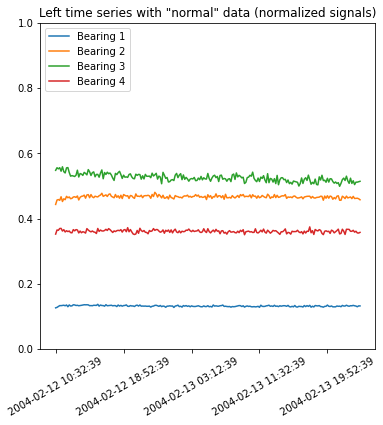

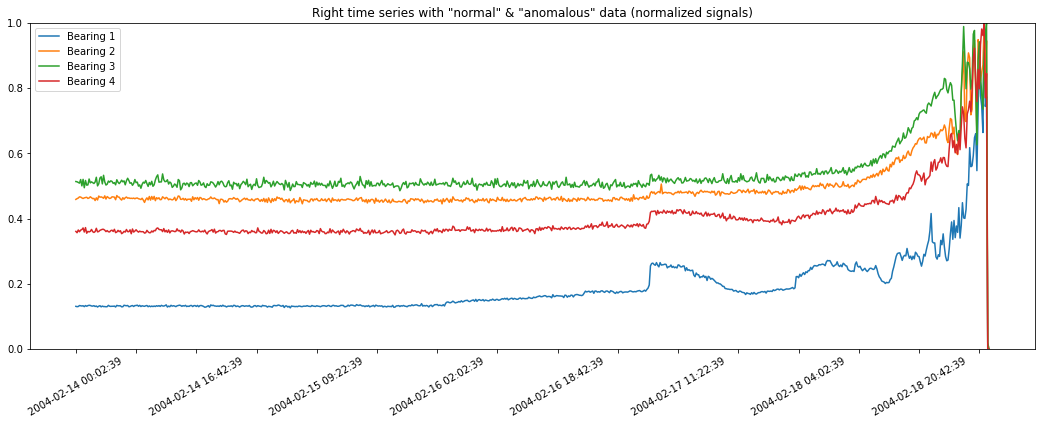

In [9]:
x_ticks_span = 50

dataset_train.plot(figsize = (6,6), title ='Left time series with "normal" data (normalized signals)')
plt.xticks(np.arange(0, dataset_train.shape[0], x_ticks_span), fontsize=10, rotation = 30)
plt.ylim(0,1)
plt.legend(loc="upper left")  
plt.show()

dataset_test.plot(figsize = (18,6), title='Right time series with "normal" & "anomalous" data (normalized signals)')
plt.xticks(np.arange(0, dataset_test.shape[0], x_ticks_span), fontsize=10, rotation = 30)
plt.ylim(0,1)
plt.legend(loc="upper left")  
plt.show()

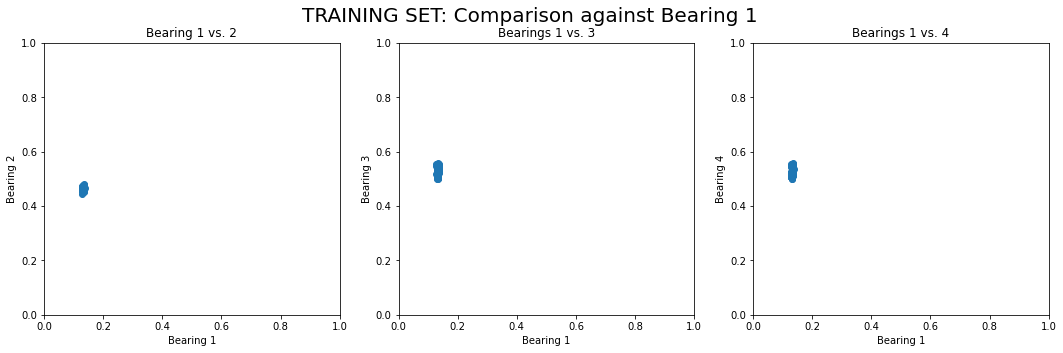

In [10]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
fig.suptitle('TRAINING SET: Comparison against Bearing 1', fontsize=20)

axes[0].scatter(np.array(dataset_train['Bearing 1']), np.array(dataset_train['Bearing 2']))
axes[0].set_xlabel('Bearing 1')
axes[0].set_ylabel('Bearing 2')
axes[0].set_title('Bearing 1 vs. 2')
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,1)

axes[1].scatter(np.array(dataset_train['Bearing 1']), np.array(dataset_train['Bearing 3']))
axes[1].set_xlabel('Bearing 1')
axes[1].set_ylabel('Bearing 3')
axes[1].set_title('Bearings 1 vs. 3')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

axes[2].scatter(np.array(dataset_train['Bearing 1']), np.array(dataset_train['Bearing 3']))
axes[2].set_xlabel('Bearing 1')
axes[2].set_ylabel('Bearing 4')
axes[2].set_title('Bearings 1 vs. 4')
axes[2].set_xlim(0,1)
axes[2].set_ylim(0,1)

plt.show()

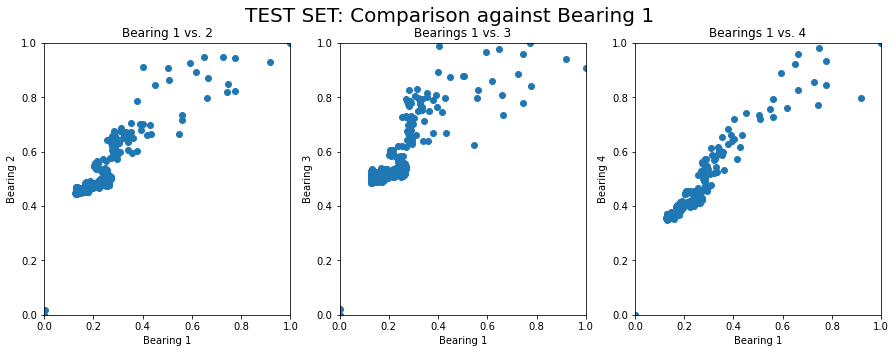

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle('TEST SET: Comparison against Bearing 1', fontsize=20)

axes[0].scatter(np.array(dataset_test['Bearing 1']), np.array(dataset_test['Bearing 2']))
axes[0].set_xlabel('Bearing 1')
axes[0].set_ylabel('Bearing 2')
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,1)
axes[0].set_title('Bearing 1 vs. 2')

axes[1].scatter(np.array(dataset_test['Bearing 1']), np.array(dataset_test['Bearing 3']))
axes[1].set_xlabel('Bearing 1')
axes[1].set_ylabel('Bearing 3')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)
axes[1].set_title('Bearings 1 vs. 3')

axes[2].scatter(np.array(dataset_test['Bearing 1']), np.array(dataset_test['Bearing 4']))
axes[2].set_xlabel('Bearing 1')
axes[2].set_ylabel('Bearing 4')
axes[2].set_xlim(0,1)
axes[2].set_ylim(0,1)
axes[2].set_title('Bearings 1 vs. 4')

plt.show()

# PCA model: Principal Components analysis
Apply dimensionality reduction to scale down from 4 dimensions to only 2 signal

In [12]:
from sklearn.decomposition import PCA

n_components = 4 # How many dimensions you want to reduce to
pca = PCA(n_components=n_components, svd_solver= 'full')

In [13]:
# Compute all PCA components FOR THE TRAINING SET
X_train_PCA = pca.fit_transform(dataset_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = dataset_train.index

# Project the TEST SET onto the PCA space
X_test_PCA = pca.transform(dataset_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = dataset_test.index

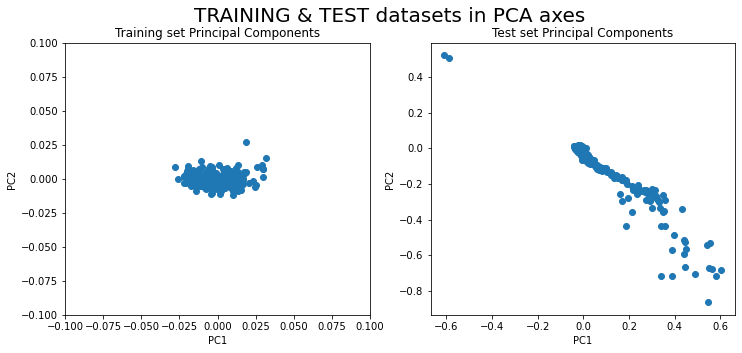

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
fig.suptitle('TRAINING & TEST datasets in PCA axes', fontsize=20)

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:,0], X_train_PCA.loc[:,1])
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-0.1,0.1)
ax0.set_ylim(-0.1,0.1)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:,0], X_test_PCA.loc[:,1])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Test set Principal Components')

plt.show()

## Variance ratio (as per training set)
We can see that in the PCA space, the variance is maximized along PC1 (explains 93% of the variance) and PC2 (explains 5.5%)
- Components are listed per importance (greater variance contribution)

In [15]:
np.set_printoptions(precision=3, suppress=True) # 3 decimal places and don't use scientific notation

pca.fit_transform(dataset_train)
print(pca.explained_variance_ratio_)

[0.768 0.141 0.078 0.014]


In [16]:
np.set_printoptions(precision=1, suppress=False) # Use scientific notation
print(pca.explained_variance_)

[1.4e-04 2.7e-05 1.5e-05 2.5e-06]


### As per the result above, components 1 and 2 accounts for the 76.8 + 14.1 = 90.9% of the total variance

## Reduce the analysis to the first two PCA components

In [17]:
pca = PCA(n_components= 2, svd_solver= 'full')

# Compute (2) PCA most relevant components FOR THE TRAINING SET
X_train_PCA = pca.fit_transform(dataset_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = dataset_train.index

# Project the TEST SET onto the PCA space (2 dimensions)
X_test_PCA = pca.transform(dataset_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = dataset_test.index

# Computing the Mahalanobis distance
The Mahalanobis distance is widely used in cluster analysis and classification techniques. In order to use the Mahalanobis distance to classify a test point as belonging to one of N classes, one first estimates the covariance matrix of each class, usually based on samples known to belong to each class.

In our case, as we are only interested in classifying “normal” vs “anomaly”, we use training data that only contains normal operating conditions to calculate the covariance matrix.
  - This explains while we built the training dataset as explained above

### Functions' definition

In [18]:
# CALCULATE THE COVARIANCE
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
        
# CALCULATE THE MAHALANOBIS DISTANCE
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

# CHECK IF MATRIX IS POSITIVE DEFINITE
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

## Set up PCA model
Define train/test set from the two main principal components:

In [19]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

Calculate the covariance matrix and its inverse, based on data in the training set:

In [20]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

We also calculate the mean value for the input variables in the training set, as this is used later to calculate the Mahalanobis distance to datapoints in the test set:

In [21]:
# Mean of each column: PCA1, PCA2
## - It should be very close to zero
mean_distr = data_train.mean(axis=0) # axis=0 means that average is computed per column
np.set_printoptions(precision=3, suppress=False)
mean_distr

array([-2.171e-17,  4.358e-17])

Using the covariance matrix and its inverse, we can calculate the Mahalanobis distance for the training data defining “normal conditions”, and find the threshold value to flag datapoints as an anomaly.
Then calculate the Mahalanobis distance for the datapoints in the test set, and compare that with the anomaly threshold:

In [22]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train) )
print("Minimum & maximum MD in test set    :", min(dist_test), max(dist_test) )

Minimum & maximum MD in training set: 0.0696992653546772 5.505767384168232
Minimum & maximum MD in test set    : 0.23655787260300895 173.80027849014348


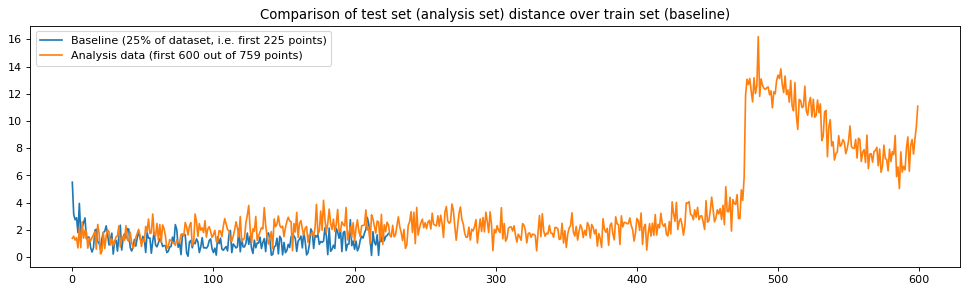

In [23]:
figure(figsize=(15, 4), dpi=80)
plt.plot(np.array(dist_train) , label="Baseline (25% of dataset, i.e. first 225 points)")
plt.plot(np.array(dist_test)[:600], label="Analysis data (first 600 out of 759 points)")
plt.legend(loc="upper left")
plt.title("Comparison of test set (analysis set) distance over train set (baseline)")
plt.show()

You can see that there is a large portion of *normal* data in the analysis (test) set. This validates the lenght of the dataset we selected for establishing the baseline (train set).

## Threshold value for flagging an anomaly

In [24]:
# CALCULATE THRESHOLD FOR CLASSIFYING AS ANOMALY
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

threshold = MD_threshold(dist_train, extreme = True)
#  * extreme = True => twice the mean of incoming data (dist_train)
#  * extreme = False => three times the mean
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold) )

Threshold value for flagging an anomaly is 3.66


The square of the Mahalanobis distance to the centroid of the distribution should follow a χ2 distribution if the assumption of normal distributed input variables is fulfilled. This is also the assumption behind the above calculation of the “threshold value” for flagging an anomaly. As this assumption is not necessarily fulfilled in our case, it is beneficial to visualize the distribution of the Mahalanobis distance to set a good threshold value for flagging anomalies.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


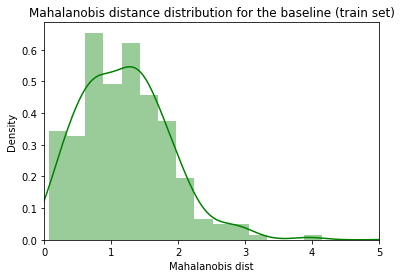

In [25]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the baseline (train set)')
plt.show()

From the above distributions, the calculated threshold value of 3.66 for flagging an anomaly seems reasonable (defined as 3 standard deviations from the center of the distribution).

We can then save the Mahalanobis distance, as well as the threshold value and “anomaly flag” variable for both train and test data in a dataframe:

### Outliers in the baseline (*train set*)

In [26]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
anomaly_train.head()

There are 2 anomalies in the train set out of 225 points


,Mob dist,Thresh,Anomaly
2004-02-12 10:32:39,5.505767,3.655333,True
2004-02-12 10:42:39,3.131046,3.655333,False
2004-02-12 10:52:39,2.752050,3.655333,False
2004-02-12 11:02:39,2.893310,3.655333,False
2004-02-12 11:12:39,1.800885,3.655333,False


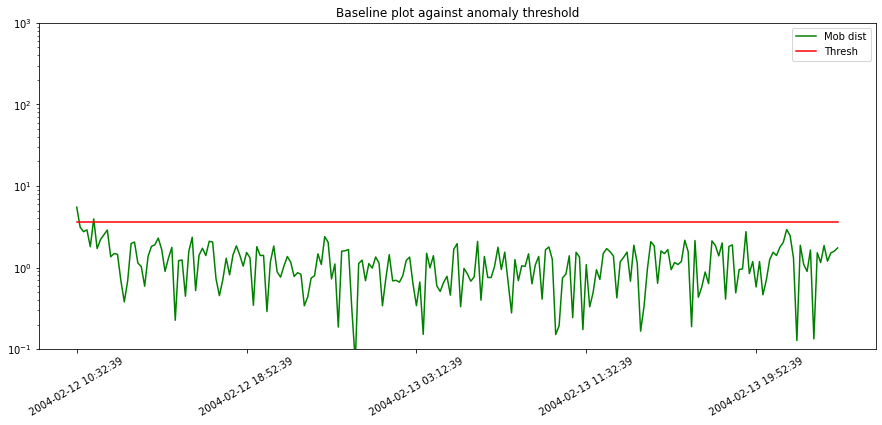

In [27]:
anomaly_train.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['green','red'])
plt.xticks(np.arange(0, anomaly_train.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Baseline plot against anomaly threshold')
plt.show()

### Outliers in the analysis set (*test set*)

In [28]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index

n_outliers = anomaly[ anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
anomaly_train.head()

There are 306 anomalies in the test set out of 759 points


,Mob dist,Thresh,Anomaly
2004-02-12 10:32:39,5.505767,3.655333,True
2004-02-12 10:42:39,3.131046,3.655333,False
2004-02-12 10:52:39,2.752050,3.655333,False
2004-02-12 11:02:39,2.893310,3.655333,False
2004-02-12 11:12:39,1.800885,3.655333,False


In [29]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-02-14 00:02:39,1.380601,3.655333,False
2004-02-14 00:12:39,1.538392,3.655333,False
2004-02-14 00:22:39,1.255249,3.655333,False
2004-02-14 00:32:39,1.428627,3.655333,False
2004-02-14 00:42:39,0.676830,3.655333,False


Based on the calculated statistics, any distance above the threshold value will be flagged as an anomaly.

We can now merge the data in a single dataframe and save it as a .csv file:

In [30]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
#anomaly_alldata.to_csv('Anomaly_distance.csv')

We can now plot the calculated anomaly metric (Mob dist), and check when it crosses the anomaly threshold (note the logarithmic y-axis).

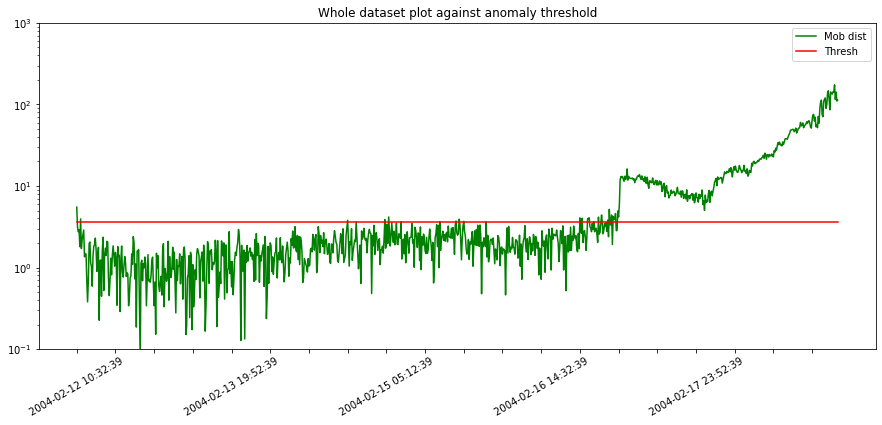

In [31]:
anomaly_alldata.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['green','red'])
plt.xticks(np.arange(0, anomaly_alldata.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Whole dataset plot against anomaly threshold')
plt.show()